# <center>Predictive modeling of apartment listings</center>

## 0) Imports

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
import tensorflow as tf
import glob

import dataprocessing as dp

%load_ext nb_black
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
pd.set_option("display.precision", 2)
pd.set_option("display.max_columns", None)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## 1) Saleprice Prediction

### 1.1) Multivariate linear regression

#### load data:

In [2]:
dates = sorted(
    [
        s[s.find("mieten") + len("mieten") : s.rfind(".csv")]
        for s in glob.glob("../data/mieten*")
    ]
)
sale_df = dp.create_sale_df(dates[-1])

<IPython.core.display.Javascript object>

#### prepare data for regression:

In [3]:
target = "price_m2"
allowed_nan_percentage = 0.1

sale_reg_df = sale_df.select_dtypes("number")
sale_reg_df = sale_reg_df.drop(
    columns=["pricetrend", "scoutId", "plz", "zipCode", "project_id", "cId",], axis=1
)

sale_reg_df = sale_reg_df.loc[
    :, sale_reg_df.isnull().sum() < allowed_nan_percentage * sale_reg_df.shape[0]
]
sale_reg_df.replace([np.inf, -np.inf], np.nan)
sale_reg_df = sale_reg_df[~sale_reg_df.isin([np.nan, np.inf, -np.inf]).any(1)]
sale_reg_df = sale_reg_df[~(sale_reg_df[target] == 0)]

X = sale_reg_df.drop(columns=target).values
y = sale_reg_df[target].values

sale_reg_df

,picturecount,yearConstructed,pricetrendbuy,purchasePriceRange,yearConstructedRange,pricetrendrent,livingSpace,noRooms,purchasePrice,noRoomsRange,livingSpaceRange,price_m2
0,15,1977.0,16.54,6,3.0,8.84,73.32,3.0,2.77e+05,3,3,3776.60
1,15,1966.0,10.77,4,2.0,5.67,33.38,1.0,2.00e+05,1,1,5976.63
2,9,2020.0,8.18,5,9.0,3.98,63.00,3.0,2.19e+05,3,3,3476.19
3,20,1928.0,8.66,2,1.0,3.33,61.62,2.0,9.43e+04,2,3,1530.00
4,1,2017.0,5.36,11,9.0,5.01,165.00,5.0,1.95e+06,5,7,11818.18
...,...,...,...,...,...,...,...,...,...,...,...,...
36596,2,2000.0,5.46,6,5.0,1.31,108.00,4.0,2.99e+05,4,5,2768.52
36597,8,1970.0,9.07,5,2.0,3.84,77.00,3.0,2.15e+05,3,3,2792.21
36598,3,1984.0,-1.82,1,4.0,2.73,70.00,2.0,4.85e+04,2,3,692.86
36599,23,1901.0,3.70,1,1.0,3.08,55.00,2.0,4.85e+04,2,2,881.82


<IPython.core.display.Javascript object>

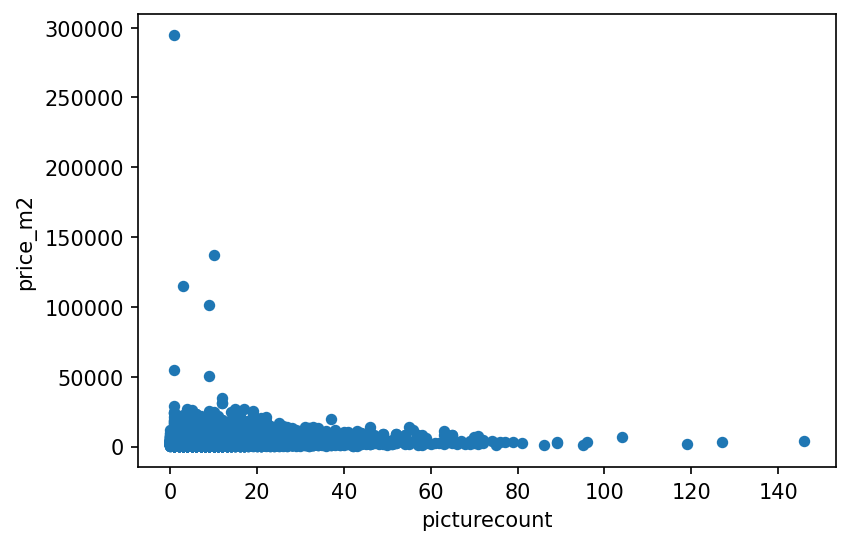

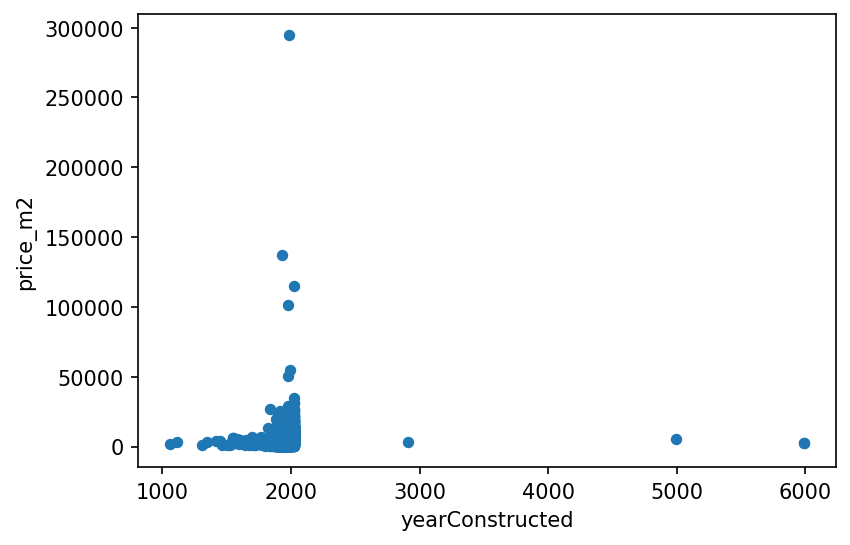

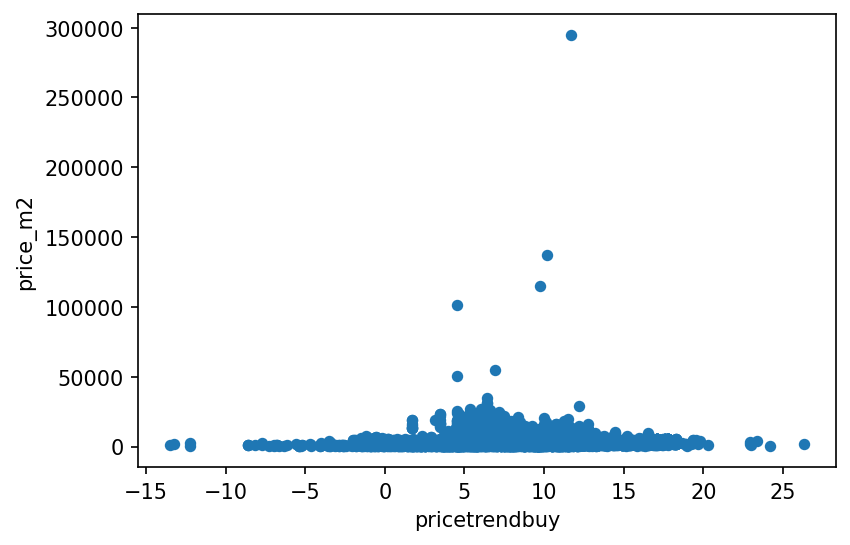

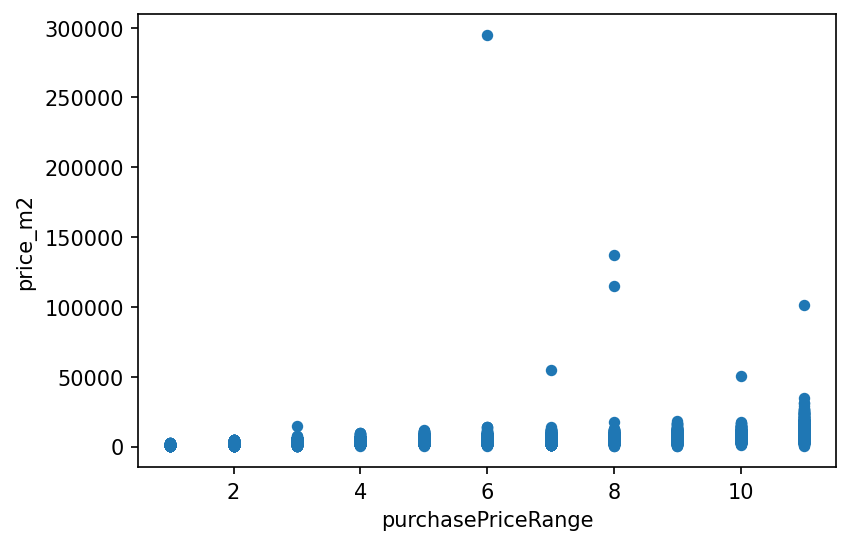

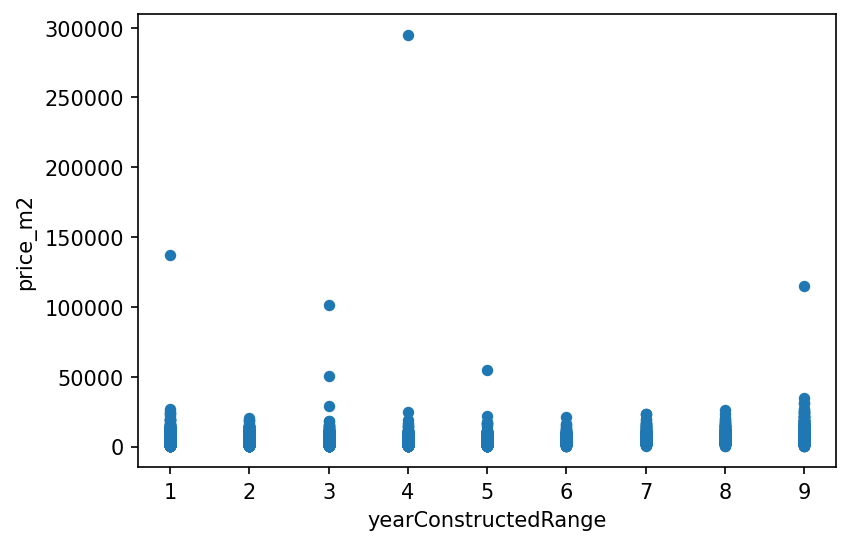

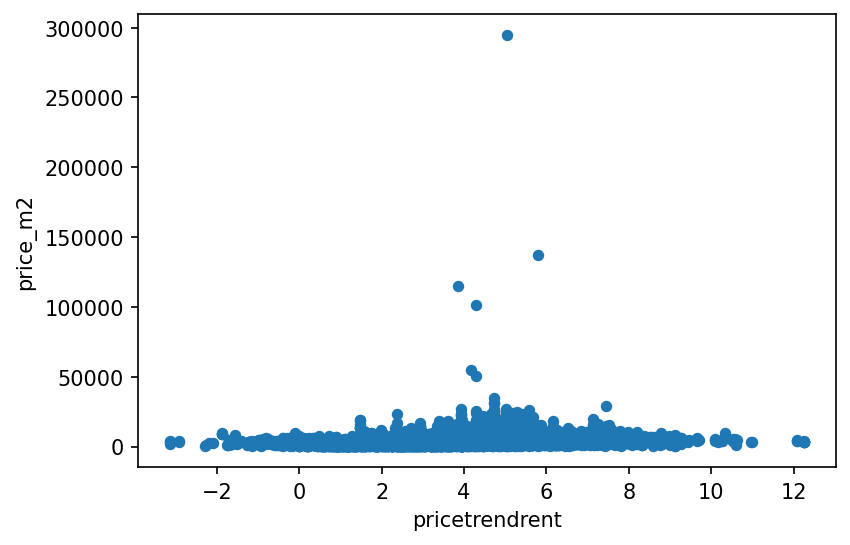

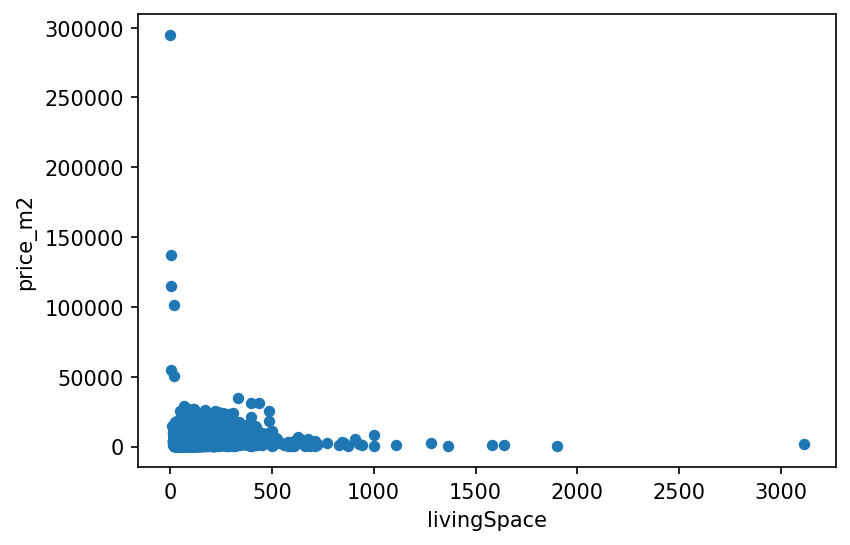

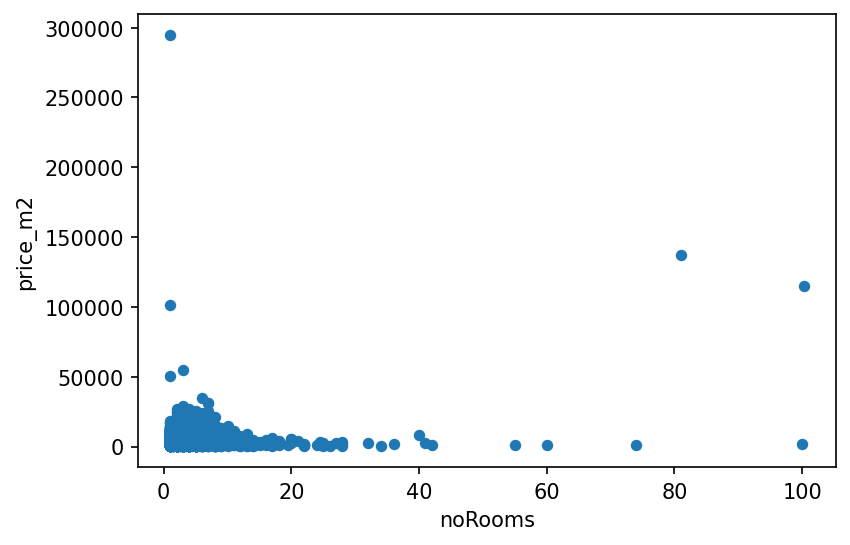

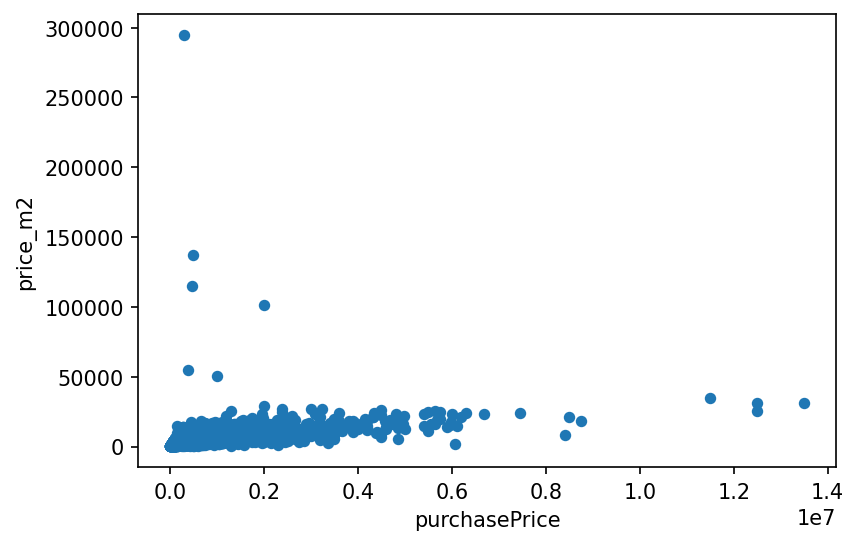

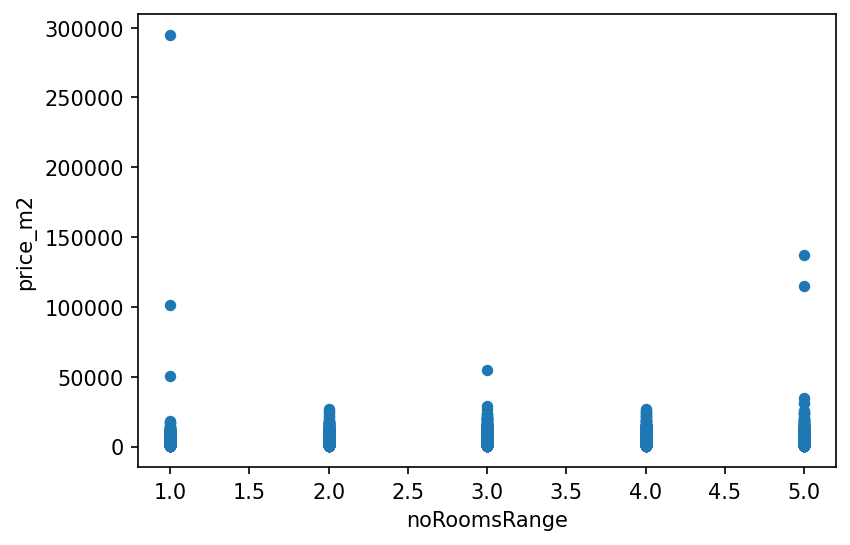

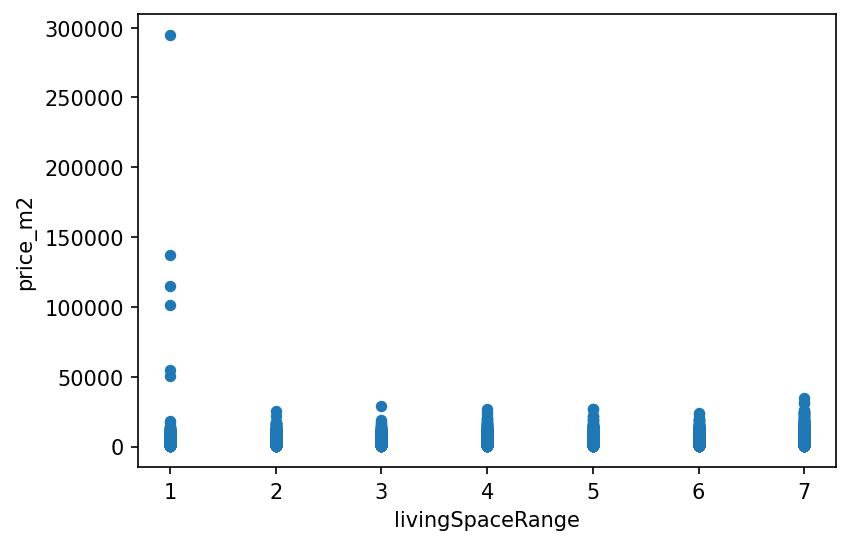

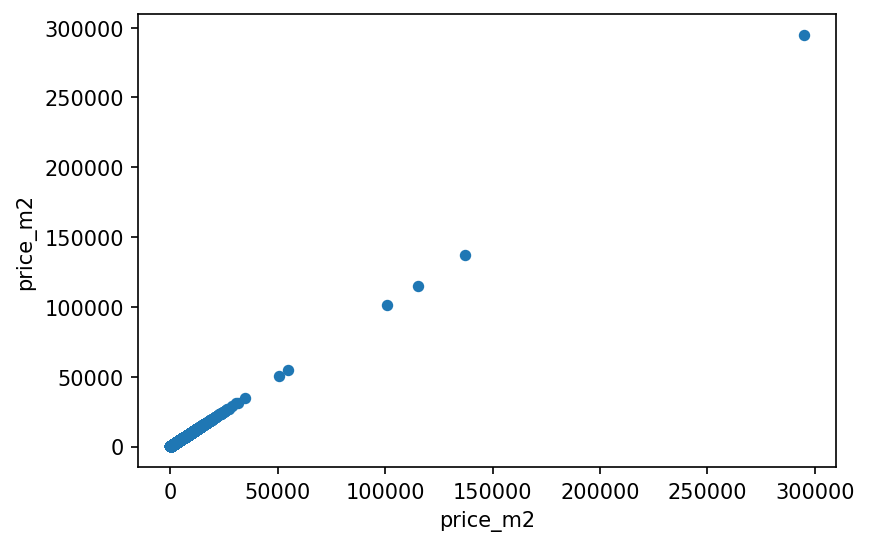

<IPython.core.display.Javascript object>

In [8]:
for column in sale_reg_df.columns:
    ax1 = sale_reg_df.plot.scatter(x=column, y=target)

#### fit data:

In [ ]:
reg = LinearRegression(normalize=True).fit(X, y)
for co in reg.coef_:
    print(co)

## 2) Future rents prediction